[0.0000e+00 1.0000e-03 2.0000e-03 ... 1.2564e+01 1.2565e+01 1.2566e+01]


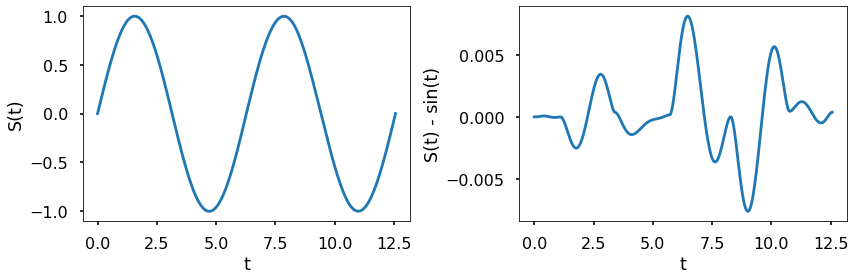

In [90]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

plt.style.use('seaborn-poster')

%matplotlib inline

F = lambda t, s: np.cos(t)

t_eval = np.arange(0, 4*np.pi, 0.001)
print(t_eval)
sol = solve_ivp(F, [0, 4*np.pi], [0], t_eval=t_eval)

plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.subplot(122)
plt.plot(sol.t, sol.y[0] - np.sin(sol.t))
plt.xlabel('t')
plt.ylabel('S(t) - sin(t)')
plt.tight_layout()
plt.show()


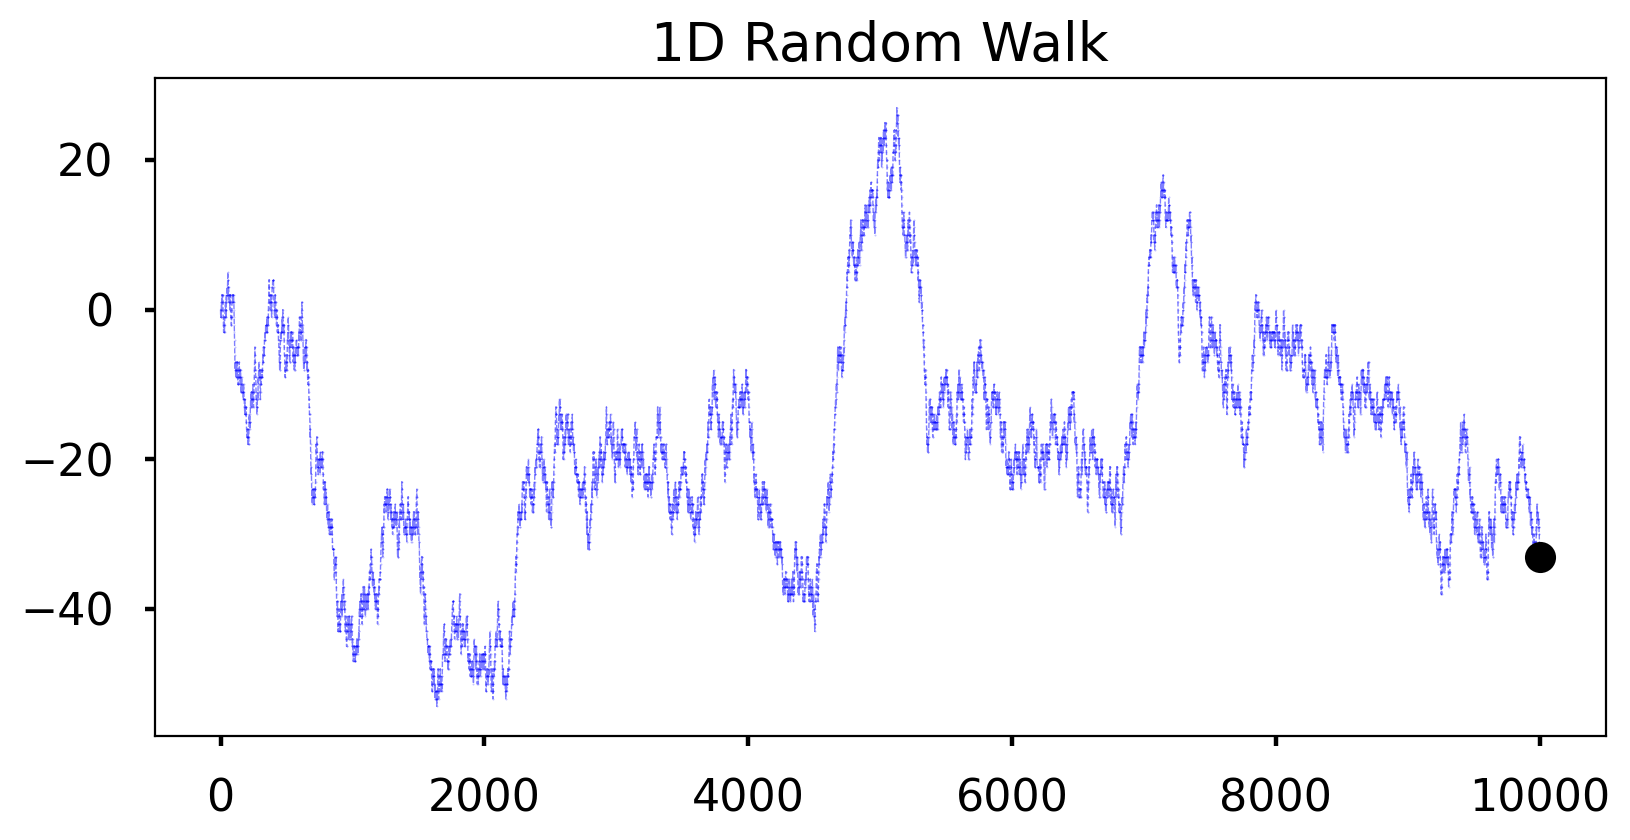

In [91]:
# Define parameters for the walk
dims = 1
step_n = 10000
step_set = [-1, 0, 1]
origin = np.zeros((1,dims))
# Simulate steps in 1D
step_shape = (step_n,dims)
steps = np.random.choice(a=step_set, size=step_shape)
path = np.concatenate([origin, steps]).cumsum(0)
start = path[:1]
stop = path[-1:]
# Plot the path
fig = plt.figure(figsize=(8,4),dpi=200)
ax = fig.add_subplot(111)
ax.scatter(np.arange(step_n+1), path, c="blue",alpha=0.25,s=0.05);
ax.plot(path,c="blue",alpha=0.5,lw=0.5,ls="--",);
ax.plot(0, start, c="red", marker="+")
ax.plot(step_n, stop, c="black", marker="o")
plt.title("1D Random Walk")
plt.tight_layout(pad=0)
plt.savefig("random_walk_1d.png",dpi=250);

100%|██████████| 10000/10000 [00:31<00:00, 315.62it/s]


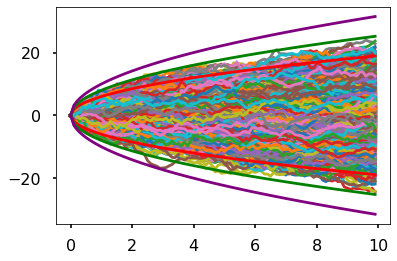

In [146]:
import numpy as np
import sdeint
import matplotlib.pyplot as plt
from tqdm import trange

n= 10000
dt = 0.1
sig = 2

A = np.array([[0]])

B = np.diag([sig]) # diagonal, so independent driving Wiener processes

#tspan = np.(0.0, 10.0, 1001)

tspan = np.arange(0,10,step=dt)
x0 = np.array([0.0])

def f(x, t):
    return A.dot(x)

def G(x, t):
    return B


for idx in trange(n):
    result = sdeint.itoint(f, G, x0, tspan)
    plt.plot(tspan, result)

plt.plot(tspan, 3*sig*np.sqrt(tspan),c="red")
plt.plot(tspan, -3*sig*np.sqrt(tspan),c="red")


plt.plot(tspan, 4*sig*np.sqrt(tspan),c="green")
plt.plot(tspan, -4*sig*np.sqrt(tspan),c="green")

plt.plot(tspan, 5*sig*np.sqrt(tspan),c="purple")
plt.plot(tspan, -5*sig*np.sqrt(tspan),c="purple")


In [138]:
from tqdm import trange
from time import sleep

for i in trange(100):
    sleep(0.01)

100%|██████████| 100/100 [00:01<00:00, 95.55it/s]


In [150]:
from tqdm import tqdm
pbar = tqdm(["a", "b", "c", "d"])
for char in pbar:
    sleep(0.25)
    pbar.set_description("Processing %s" % char)

Processing d: 100%|██████████| 4/4 [00:01<00:00,  3.97it/s]
